In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.initializers import HeNormal
from matplotlib import image
from matplotlib import pyplot
import os
import shutil
import numpy as np
from PIL import Image
import pickle
from sklearn.preprocessing import MultiLabelBinarizer


# **Binary CNN**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, AveragePooling2D, BatchNormalization
from matplotlib import image
from matplotlib import pyplot
import os
import shutil
import numpy as np
from PIL import Image
import pickle

In [ ]:
pathToData = "drive/MyDrive/CS 230 Final Project/Final Data and CSVs/Final CSV Files and Data/Binary Split/"
print(pathToData + "train_X.p")

drive/MyDrive/CS 230 Final Project/Final Data and CSVs/Final CSV Files and Data/Binary Split/train_X.p


In [ ]:
# load the train dataset
X_train = pickle.load(open(pathToData+"train_X.p", 'rb'))
y_train = pickle.load(open(pathToData+"train_Y.p", 'rb'))
#y_train = y_train.reshape(y_train.shape[0],-1)

print(X_train.shape)
print(y_train.shape)


# load the dev dataset
X_dev = pickle.load(open(pathToData+"dev_X.p", 'rb'))
y_dev = pickle.load(open(pathToData+"dev_Y.p", 'rb'))
#y_dev = y_dev.reshape(y_dev.shape[0],-1)

print(X_dev.shape)
print(y_dev.shape)

# load the test dataset
X_test = pickle.load(open(pathToData+"test_X.p", 'rb'))
y_test = pickle.load(open(pathToData+"test_Y.p", 'rb'))
#y_test= y_test.reshape(y_test.shape[0],-1)

print(X_test.shape)
print(y_test.shape)

print(X_train.shape[1:])

(4246, 208, 160, 3)
(4246,)
(910, 208, 160, 3)
(910,)
(910, 208, 160, 3)
(910,)
(208, 160, 3)


In [ ]:
numExamples = X_train.shape[0]
print(numExamples)

4246


In [ ]:
pathToModels = "drive/MyDrive/CS 230 Final Project/Models/"
print(pathToModels+"bestBinaryCNNModel.h5")


drive/MyDrive/CS 230 Final Project/Models/bestBinaryCNNModel.h5


In [ ]:
loadedBestCNNModel = load_model(pathToModels+"bestBinaryCNNModel.h5")

In [ ]:
_, accuracy = loadedBestCNNModel.evaluate(X_test, y_test)
print('Test Accuracy: %.2f' % (accuracy*100))

29/29 [==============================] - 11s 51ms/step - loss: 0.3227 - accuracy: 0.8681
Test Accuracy: 86.81


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, AveragePooling2D, BatchNormalization
from matplotlib import image
from matplotlib import pyplot
import os
import shutil
import numpy as np
from PIL import Image
import pickle
from sklearn.preprocessing import MultiLabelBinarizer

In [ ]:
pathToData = "drive/MyDrive/CS 230 Final Project/Final Data and CSVs/Final CSV Files and Data/Multi Split/"
print(pathToData + "train_X.p")

drive/MyDrive/CS 230 Final Project/Final Data and CSVs/Final CSV Files and Data/Multi Split/train_X.p


In [ ]:
mlb = MultiLabelBinarizer()
# load the train dataset
X_train = pickle.load(open(pathToData+"train_X.p", 'rb'))
y_trainUnflat = pickle.load(open(pathToData+"train_Y.p", 'rb'))
y_train = y_trainUnflat.reshape(y_trainUnflat.shape[0],-1)
y_train = mlb.fit_transform(y_train)

print(X_train.shape)
print(y_train.shape)

# load the dev dataset
X_dev = pickle.load(open(pathToData+"dev_X.p", 'rb'))
y_devUnflat = pickle.load(open(pathToData+"dev_Y.p", 'rb'))
y_dev = y_devUnflat.reshape(y_devUnflat.shape[0],-1)
y_dev = mlb.fit_transform(y_dev)

print(X_dev.shape)
print(y_dev.shape)

# load the test dataset
X_test = pickle.load(open(pathToData+"test_X.p", 'rb'))
y_testUnflat = pickle.load(open(pathToData+"test_Y.p", 'rb'))
y_test = y_testUnflat.reshape(y_testUnflat.shape[0],-1)
y_test = mlb.fit_transform(y_test)

print(X_test.shape)
print(y_test.shape)

(4246, 208, 160, 3)
(4246, 3)
(910, 208, 160, 3)
(910, 3)
(910, 208, 160, 3)
(910, 3)


In [ ]:
print(y_trainUnflat)

[0 2 1 ... 0 1 0]


In [ ]:
numExamples = X_train.shape[0]
print(numExamples)

4246


In [ ]:
print(X_train.shape[1:])

(208, 160, 3)


In [ ]:
loadedBestCNNModel.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 208, 160, 32)      2432      
                                                                 
 batch_normalization_5 (Batc  (None, 208, 160, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 103, 79, 32)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 103, 79, 64)       51264     
                                                                 
 batch_normalization_6 (Batc  (None, 103, 79, 64)      256       
 hNormalization)                                                 
                                                      

In [ ]:
#HYPERPARAMETER SEARCH OVER EPOCH NUMBER and BATCH SIZE
#We keep number of layers, neuron per layer, activation in each layer constant
batchSizes = [100,200,300]

#print(numEpochsToTest)
print(batchSizes)
numEpochs = 30

[100, 200, 300]


In [ ]:
trainAccuracy = []
valAccuracy = []
trainLoss = []
valLoss = []

for batchSize in batchSizes:
  loadedBestModel = load_model(pathToModels+"bestBinaryCNNModel.h5")
  for layer in loadedBestModel.layers[:6]:
    layer.trainable = False
  print("BatchSize : ", batchSize)
  model = Sequential()
  for layer in loadedBestModel.layers[:-1]:
    model.add(layer)

  model.add(Dense(3, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
  history = model.fit(X_train, y_train, epochs=numEpochs, batch_size=batchSize, validation_data = (X_dev, y_dev))
  historyDict = history.history
  #print(historyDict.keys())
  #trainAccuracy.append(historyDict["accuracy"])
  #valAccuracy.append(historyDict["val_accuracy"])
  trainLoss.append(historyDict['loss'])
  valLoss.append(historyDict['val_loss'])

BatchSize :  100
Epoch 1/30
43/43 [==============================] - 13s 205ms/step - loss: 0.6500 - categorical_accuracy: 0.7143 - val_loss: 0.5559 - val_categorical_accuracy: 0.7495
Epoch 2/30
43/43 [==============================] - 7s 158ms/step - loss: 0.3917 - categorical_accuracy: 0.8260 - val_loss: 0.4449 - val_categorical_accuracy: 0.7846
Epoch 3/30
43/43 [==============================] - 7s 159ms/step - loss: 0.2434 - categorical_accuracy: 0.9034 - val_loss: 0.3982 - val_categorical_accuracy: 0.8198
Epoch 4/30
43/43 [==============================] - 7s 159ms/step - loss: 0.1332 - categorical_accuracy: 0.9522 - val_loss: 0.4828 - val_categorical_accuracy: 0.8209
Epoch 5/30
43/43 [==============================] - 7s 172ms/step - loss: 0.0498 - categorical_accuracy: 0.9856 - val_loss: 0.3048 - val_categorical_accuracy: 0.8945
Epoch 6/30
43/43 [==============================] - 7s 159ms/step - loss: 0.0304 - categorical_accuracy: 0.9922 - val_loss: 0.3402 - val_categorical_acc

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


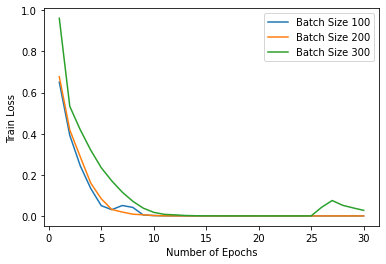

In [ ]:
#For Loss Plotting

x = [i for i in range(1,numEpochs+1)]
print(x)
yTrainLoss = trainLoss
#Train Loss
for i in range(len(batchSizes)):
  currBatchSize = batchSizes[i]
  labelName = "Batch Size " + str(currBatchSize)
  pyplot.plot(x, yTrainLoss[i],label=labelName)
#pyplot.xlim([1,2])
pyplot.legend()
pyplot.xlabel("Number of Epochs")
pyplot.ylabel("Train Loss")
pyplot.show()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


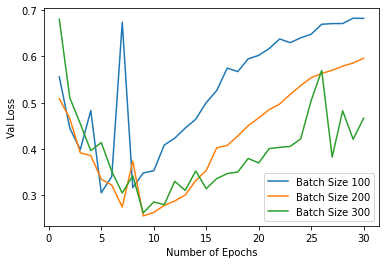

In [ ]:
#For Loss Plotting

x = [i for i in range(1,numEpochs+1)]
print(x)
yValLoss = valLoss
#Val Loss
for i in range(len(batchSizes)):
  currBatchSize = batchSizes[i]
  labelName = "Batch Size " + str(currBatchSize)
  pyplot.plot(x, yValLoss[i],label=labelName)
#pyplot.xlim([1, 2])
pyplot.legend()
pyplot.xlabel("Number of Epochs")
pyplot.ylabel("Val Loss")
pyplot.show()

In [ ]:
#For Accuracy Plotting

x = [i for i in range(1,numEpochs+1)]
print(x)
yValAcc = valAccuracy
#Val Accuracies
for i in range(len(batchSizes)):
  currBatchSize = batchSizes[i]
  labelName = "Batch Size " + str(currBatchSize)
  pyplot.plot(x, yValAcc[i],label=labelName)

#pyplot.ylim([0.6,1])
pyplot.legend()
pyplot.xlabel("Number of Epochs")
pyplot.ylabel("Val Accuracy")
pyplot.show()

In [ ]:
#For Loss Plotting

x = [i for i in range(1,numEpochs+1)]
print(x)
yValLoss = valLoss
for i in range(len(batchSizes)):
  currBatchSize = batchSizes[i]
  labelName = "Batch Size " + str(currBatchSize)
  pyplot.plot(x, yValLoss[i],label="Val"+str(currBatchSize))
  pyplot.plot(x, yTrainLoss[i],label="Train"+str(currBatchSize))

pyplot.xlim([1,5])
#pyplot.ylim([0,2])
pyplot.legend()
pyplot.xlabel("Number of Epochs")
pyplot.ylabel("Loss")
pyplot.show()

In [ ]:
bestEpochs = 9
bestBatchSize = 200

In [ ]:
loadedBestModel = load_model(pathToModels+"bestBinaryCNNModel.h5")
for layer in loadedBestModel.layers[:6]:
  layer.trainable = False
bestmodel = Sequential()
for layer in loadedBestModel.layers[:-1]:
  bestmodel.add(layer)

bestmodel.add(Dense(3, activation='softmax'))
bestmodel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
bestmodel.fit(X_train, y_train, epochs=bestEpochs, batch_size=bestBatchSize, validation_data = (X_dev, y_dev))

Epoch 1/9
22/22 [==============================] - 60s 303ms/step - loss: 0.6601 - categorical_accuracy: 0.7317 - val_loss: 0.5258 - val_categorical_accuracy: 0.7582
Epoch 2/9
22/22 [==============================] - 6s 283ms/step - loss: 0.4287 - categorical_accuracy: 0.8161 - val_loss: 0.5674 - val_categorical_accuracy: 0.7297
Epoch 3/9
22/22 [==============================] - 6s 282ms/step - loss: 0.3084 - categorical_accuracy: 0.8719 - val_loss: 0.4829 - val_categorical_accuracy: 0.7956
Epoch 4/9
22/22 [==============================] - 6s 284ms/step - loss: 0.1933 - categorical_accuracy: 0.9279 - val_loss: 0.3614 - val_categorical_accuracy: 0.8692
Epoch 5/9
22/22 [==============================] - 6s 284ms/step - loss: 0.1063 - categorical_accuracy: 0.9659 - val_loss: 0.4219 - val_categorical_accuracy: 0.8538
Epoch 6/9
22/22 [==============================] - 6s 284ms/step - loss: 0.0561 - categorical_accuracy: 0.9814 - val_loss: 0.3550 - val_categorical_accuracy: 0.8846
Epoch 7/9

In [ ]:
predictions = bestmodel.predict(X_test)
#print(predictions)
#print(y_test)
yTestNew = y_test.argmax(axis=1)
yPredNew = predictions.argmax(axis=1)
print(yTestNew)
print(yPredNew)

[1 0 0 0 2 1 1 0 1 1 2 0 1 1 1 0 0 1 2 2 0 0 2 0 1 0 0 2 2 1 0 1 2 0 1 0 0
 0 0 0 1 1 1 2 1 2 1 2 1 2 0 1 1 1 1 1 0 1 1 0 1 2 0 1 0 0 1 0 1 2 2 1 2 1
 1 1 1 1 1 1 1 2 2 1 1 1 1 2 2 1 0 2 1 1 1 1 1 0 2 1 2 1 1 1 0 0 1 1 0 1 0
 0 2 1 1 1 1 0 2 0 0 0 2 0 1 1 1 0 0 1 1 0 1 1 1 1 0 1 2 2 1 2 1 0 0 0 0 0
 1 1 1 1 1 1 1 2 1 0 2 1 0 2 1 0 1 0 0 0 2 1 1 1 2 1 1 1 1 0 1 1 1 1 1 0 0
 1 0 2 1 0 2 0 2 1 2 2 2 2 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0
 2 0 0 1 0 1 2 1 1 1 1 0 0 2 1 1 1 2 2 0 1 0 1 0 1 2 1 0 1 1 0 0 2 0 1 1 1
 1 2 1 0 1 1 0 1 1 1 1 1 0 1 2 2 2 1 0 2 2 1 0 1 1 1 2 2 1 0 0 2 0 1 2 2 1
 2 1 1 0 2 2 1 2 0 1 1 1 1 1 0 1 0 0 1 0 2 0 0 1 1 2 1 0 2 0 1 1 0 0 1 1 2
 2 0 1 1 0 1 1 1 0 0 1 1 0 1 0 2 1 0 2 1 1 1 1 1 0 1 2 1 1 1 0 1 1 1 2 0 2
 0 0 0 1 2 2 2 1 1 1 1 0 1 0 0 2 1 1 1 1 1 0 1 1 2 0 0 2 0 1 0 1 1 2 0 0 1
 1 0 1 2 2 0 2 0 2 2 1 1 1 1 1 2 2 0 2 0 0 1 0 0 1 0 0 2 2 0 0 1 0 1 1 0 0
 1 0 1 1 1 0 2 0 1 0 1 0 1 0 1 0 1 2 2 0 0 0 1 1 2 0 1 0 0 1 2 1 0 0 2 1 2
 1 1 0 1 1 0 2 0 1 0 1 0 

0.9058541526895958


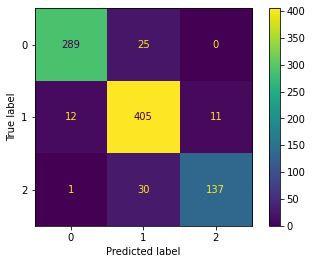

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score

cM = confusion_matrix(yTestNew,yPredNew)

displayClasses = [i for i in range(3)]

print(f1_score(yTestNew, yPredNew, average='macro'))

disp = ConfusionMatrixDisplay(confusion_matrix=cM, display_labels=displayClasses)
disp.plot()
pyplot.show()